# EDA Utilities

In this section, we will introduce a rich set of plotting functions in orbit for the EDA (exploratory data analysis) purpose. The plots include:

* Time series heatmap
* Correlation heatmap
* Dual axis time series plot
* Wrap plot

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 

import orbit
from orbit.utils.dataset import load_iclaims, load_m5daily, load_energy_hourly
from orbit.eda import eda_plot
from orbit.utils.plot import get_orbit_style
from orbit.constants import palette

orbit_style = get_orbit_style()   
plt.style.use(orbit_style)

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# read in data
df = load_iclaims()
df_monthly = df.copy()

df_monthly['month'] = df_monthly['week'].dt.to_period('M').astype(str)
df_monthly['month'] = df_monthly['month'] +'-01'
df_monthly['month'] = pd.to_datetime(df_monthly['month'])
df_monthly['year'] = df_monthly['week'].dt.year
df_monthly = df_monthly.groupby(['month', 'year'], as_index=False).mean()

In [3]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [4]:
df_monthly.head()

,month,year,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-01,2010,13.348773,0.202724,-0.248614,0.117039,-0.455804,0.336297
1,2010-02-01,2010,13.084544,0.126464,-0.218936,0.051658,-0.451601,0.212198
2,2010-03-01,2010,12.974762,0.100341,-0.177173,0.060325,-0.401501,0.084137
3,2010-04-01,2010,13.014468,0.102068,-0.237037,0.079888,-0.372733,0.123934
4,2010-05-01,2010,12.927627,-0.007502,-0.277799,0.095741,-0.460032,0.801549


## Time series heat map

### weekly - year

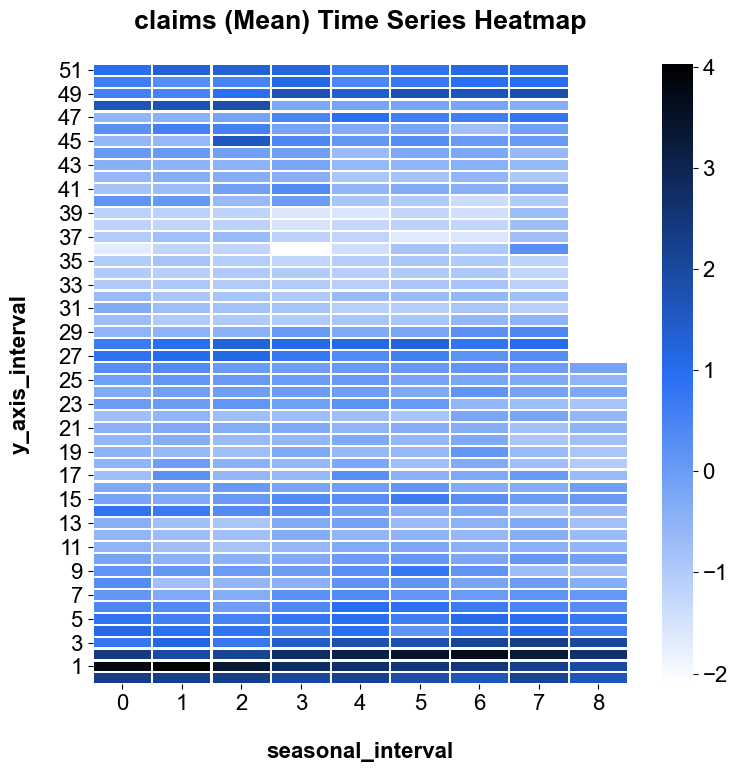

In [5]:
_ = eda_plot.ts_heatmap(df=df, date_col='week', seasonal_interval = 52, value_col='claims', fig_width = 8, fig_height=8, normalization=True)

### monthly - year

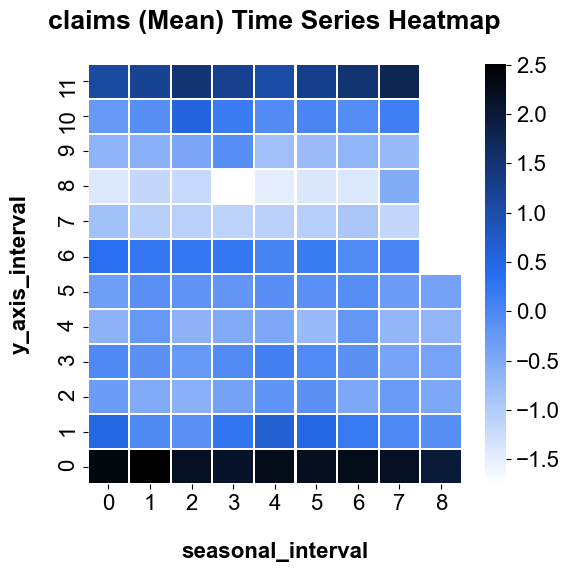

In [6]:
_ = eda_plot.ts_heatmap(df=df_monthly, date_col='month', seasonal_interval=12, fig_width = 6, fig_height=6, value_col='claims', normalization=True)

### daily - week

In [7]:
# daily data 
data = load_m5daily()
data['date'] = pd.to_datetime(data['date'])
data = data[['date', 'sales']]
data = data[(data['date'] >= '2015-01-01') & (data['date'] <= '2015-12-01')]

In [8]:
data.head()

,date,sales
1433,2015-01-01,26452
1434,2015-01-02,39633
1435,2015-01-03,41085
1436,2015-01-04,39647
1437,2015-01-05,34691


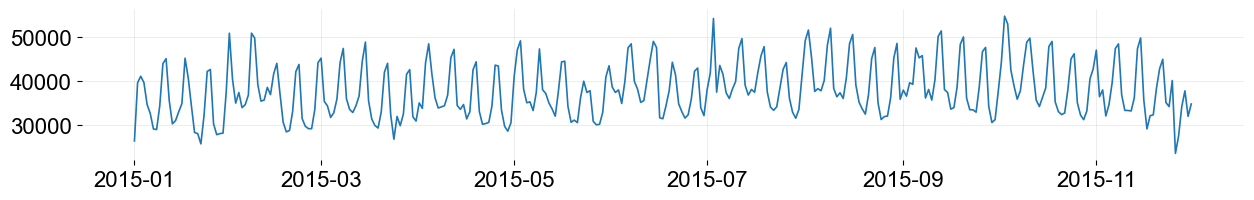

In [9]:
fig, ax = plt.subplots(figsize=(15,2))
plt.plot(data['date'], data['sales'])

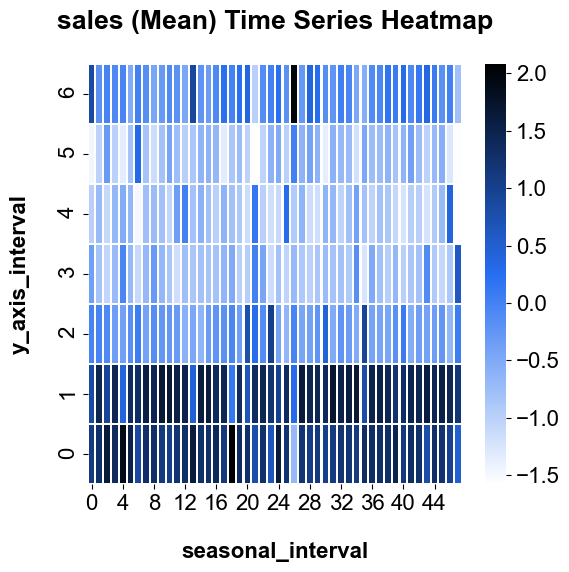

In [10]:
_ = eda_plot.ts_heatmap(df=data, date_col='date', seasonal_interval=7, fig_width = 6, fig_height=6, value_col='sales', normalization=True)

### hourly - day

In [12]:
energy_hourly = load_energy_hourly()

# energy_hourly['hour'] = pd.to_datetime(energy_hourly['Date'] + ' ' + energy_hourly['hour'])
# energy_hourly.drop(['Date', 'HR'], axis=1, inplace=True)

In [13]:
energy_hourly.head()

,PGE,SCE,SDGE,VEA,CAISO,hour
0,11451.34,11391.68,2199.00,68.16,25110.18,2021-09-01 00:00:00
1,10927.52,10891.04,2102.47,64.95,23985.98,2021-09-01 01:00:00
2,10494.04,10519.43,2038.21,62.93,23114.62,2021-09-01 02:00:00
3,10498.10,10363.86,2006.95,62.79,22931.70,2021-09-01 03:00:00
4,10428.09,10469.98,2026.70,63.94,22988.70,2021-09-01 04:00:00


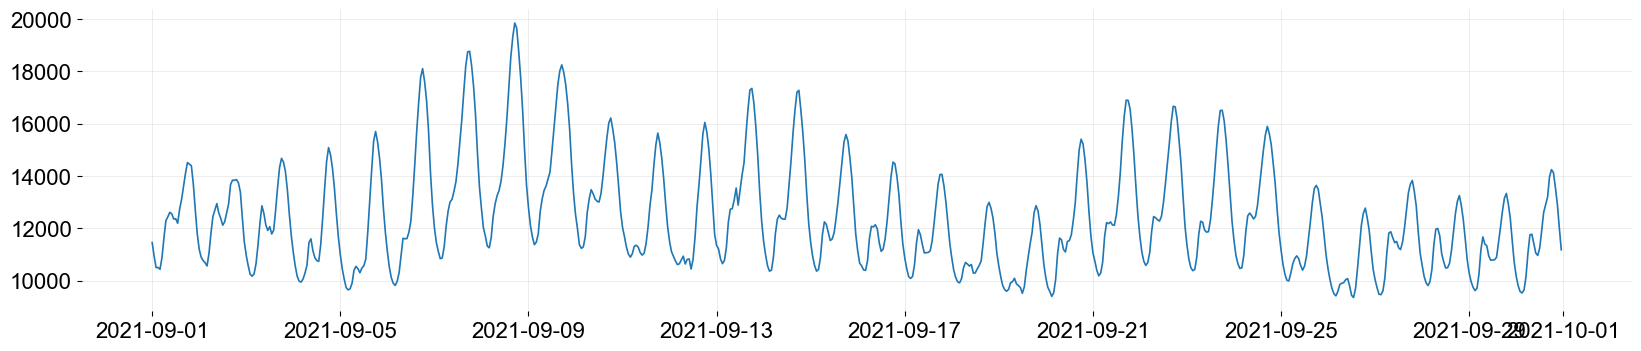

In [14]:
fig, ax = plt.subplots(figsize=(20,4))
plt.plot(energy_hourly['hour'], energy_hourly['PGE'])

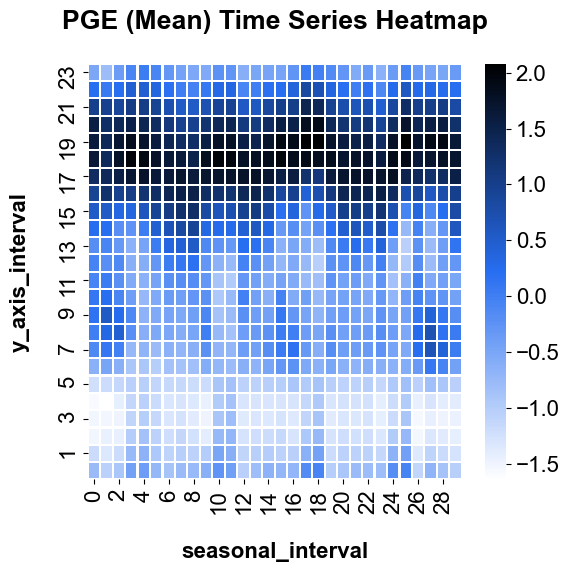

In [15]:
_ = eda_plot.ts_heatmap(df=energy_hourly, date_col='hour', seasonal_interval=24, fig_width = 6, fig_height=6, value_col='PGE', normalization=True)

## Correlation heatmap

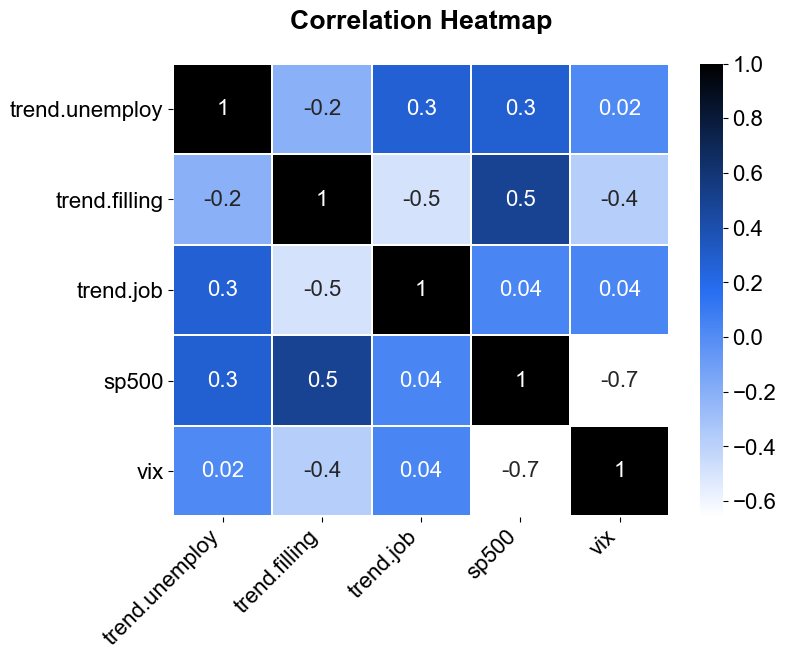

In [16]:
var_list = ['trend.unemploy', 'trend.filling', 'trend.job', 'sp500', 'vix']

_ = eda_plot.correlation_heatmap(df, var_list=var_list, fig_height=6, fig_width=8, use_orbit_style=True)

## Year over Year Outcome vs Events Time Series Plot

In [17]:
holiday = [['12/25/15', 'h_christmas'], ['12/25/16', 'h_christmas'], 
           ['12/25/17', 'h_christmas'], ['11/22/15', 'h_thanksgiving'], 
           ['11/28/16', 'h_thanksgiving'], ['11/26/17', 'h_thanksgiving'],
           ['7/4/15', 'h_independence'], ['7/4/16', 'h_independence'], 
           ['7/4/17', 'h_independence']]


holiday_df = pd.DataFrame(holiday,columns=['week', 'holiday_name'])

holiday_df['week'] = pd.to_datetime(holiday_df['week'])

## Dual axis time series plot 

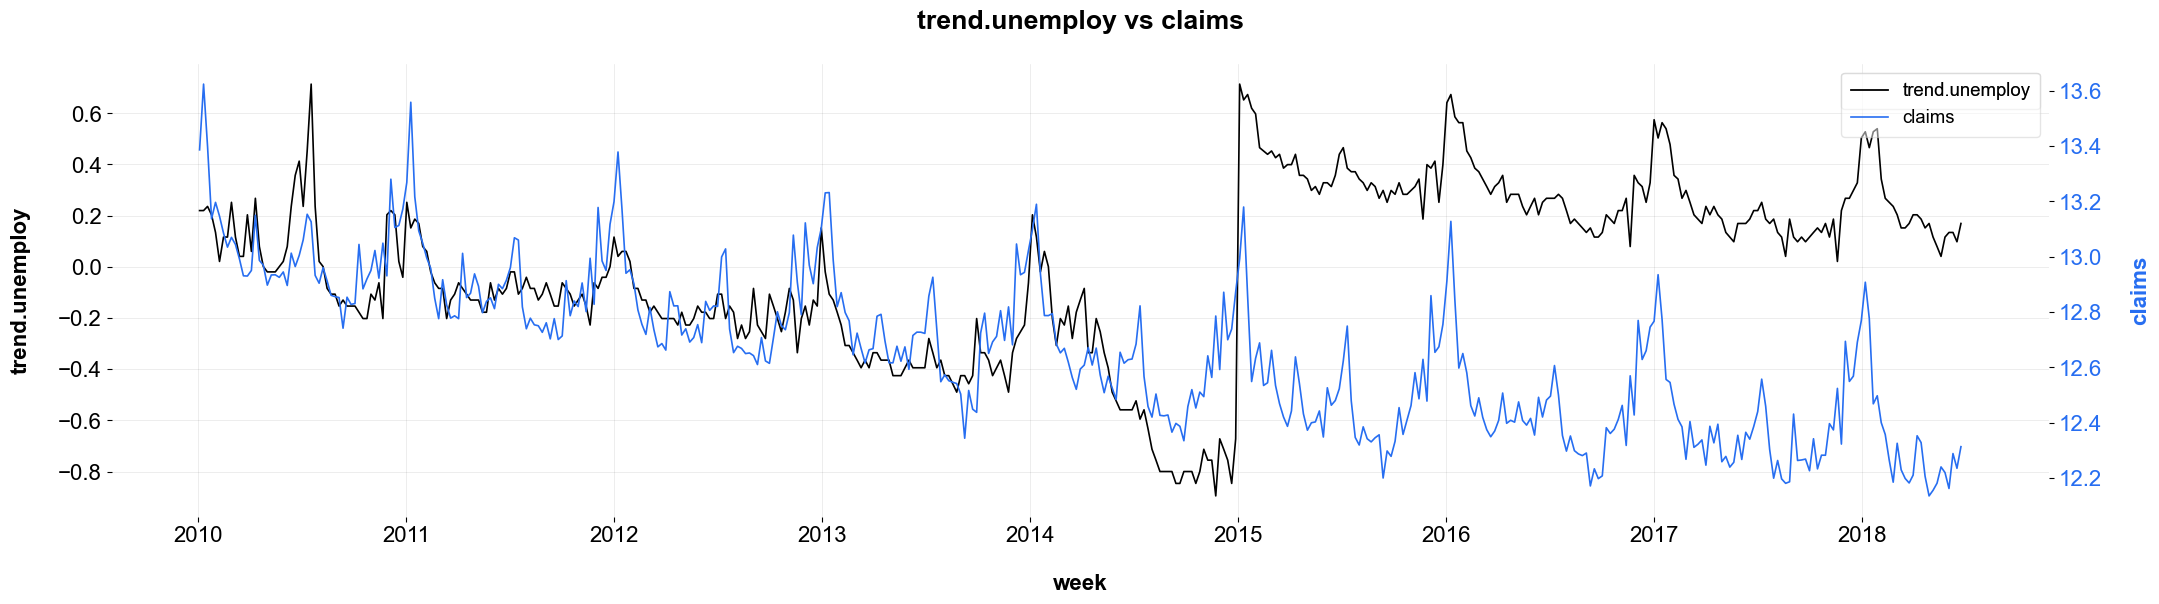

In [18]:
_ = eda_plot.dual_axis_ts_plot(df=df, var1='trend.unemploy', var2='claims', date_col='week')

## Wrap plots for quick glance of data patterns

In [19]:
var_list=['week', 'trend.unemploy', 'trend.filling', 'trend.job', 'sp500', 'vix']

df[var_list].melt(id_vars = ['week'])

,week,variable,value
0,2010-01-03,trend.unemploy,0.219882
1,2010-01-10,trend.unemploy,0.219882
2,2010-01-17,trend.unemploy,0.236143
3,2010-01-24,trend.unemploy,0.203353
4,2010-01-31,trend.unemploy,0.134360
...,...,...,...
2210,2018-05-27,vix,-0.175192
2211,2018-06-03,vix,-0.275119
2212,2018-06-10,vix,-0.291676
2213,2018-06-17,vix,-0.152422


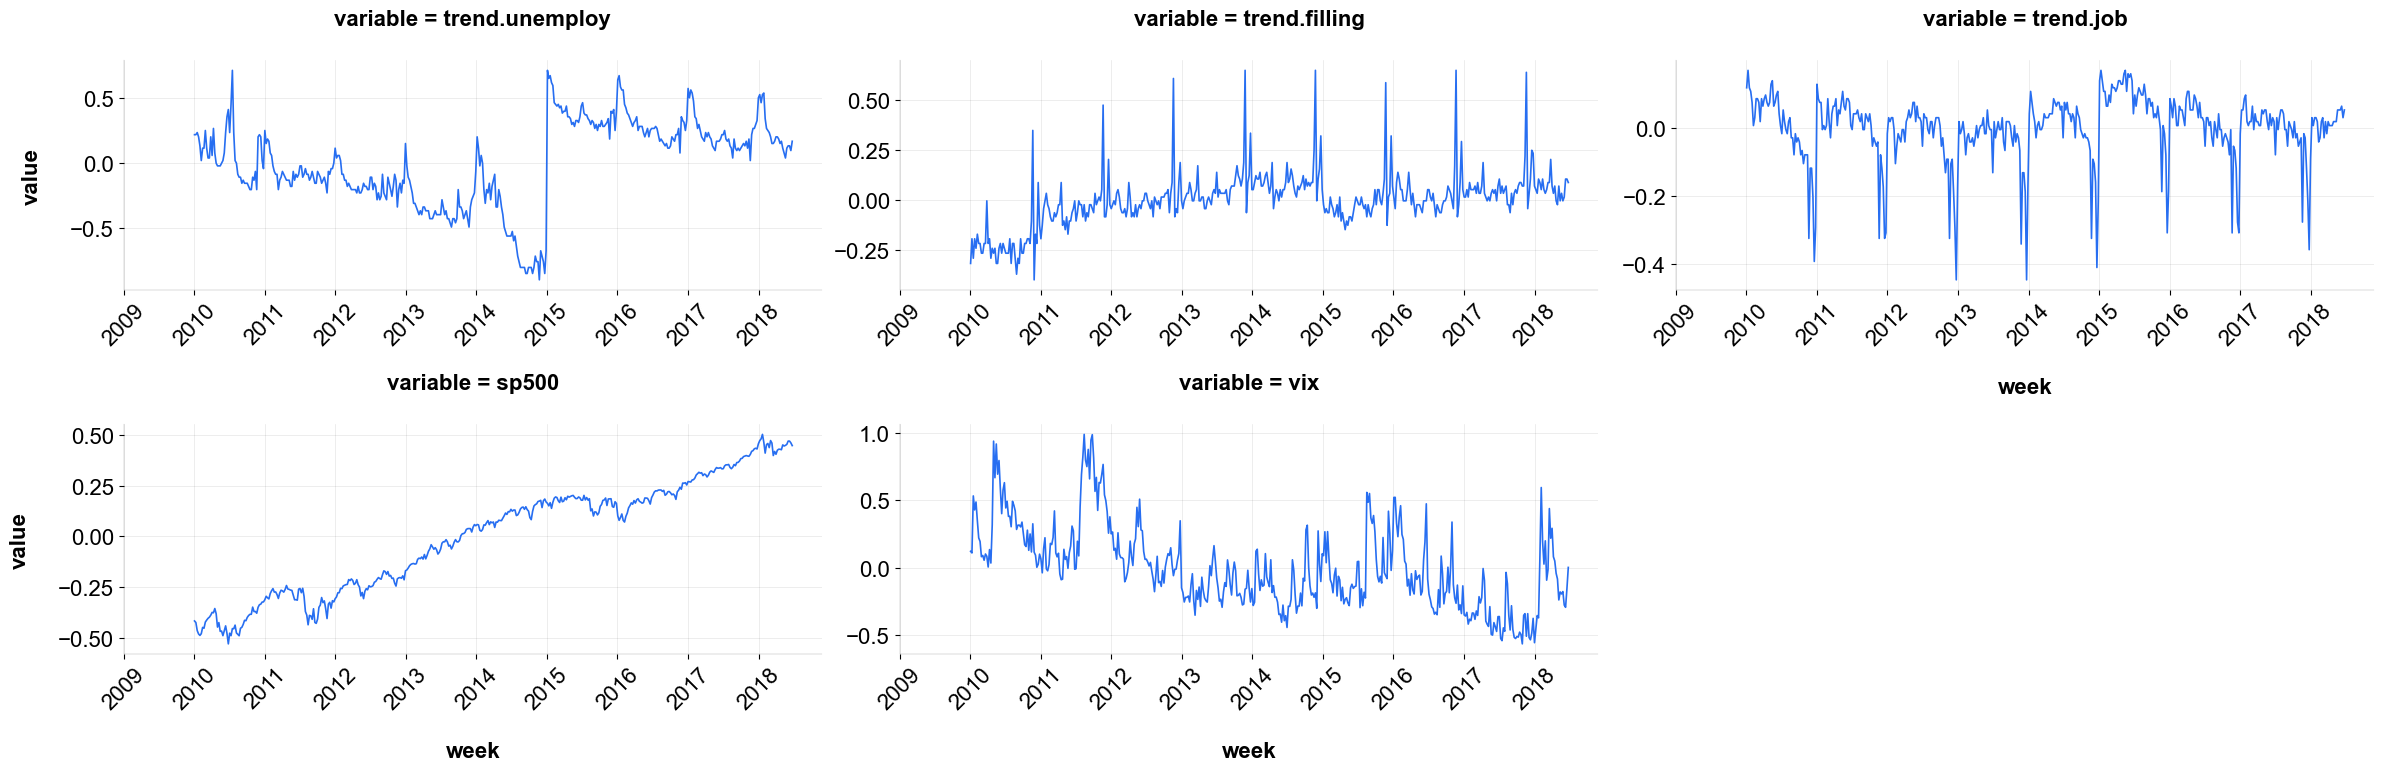

In [20]:
_ = eda_plot.wrap_plot_ts(df, 'week', var_list)